<a href="https://colab.research.google.com/github/Rajashekar-Anumalla/NYC-Taxi-trip-duration-prediction/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

# Importing Files and Libraries as required

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projects/Capstone_project_Two/NYC Taxi Trip Time Prediction/Copy of Copy of NYC Taxi Data.csv')
data.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


## Overview over dataset (Knowing about data)

In [ ]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
## data here is clean and contains no missing values.
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
##Checking for duplicates
data.duplicated().any()

False

In [ ]:
## Size of the dataset
data.shape

(1458644, 11)

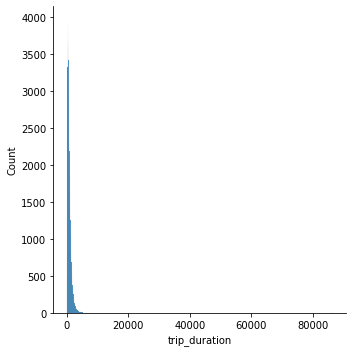

In [ ]:
## Trying to know about our target variable
sns.displot(data['trip_duration'].sample(frac = 0.1, random_state = 42))

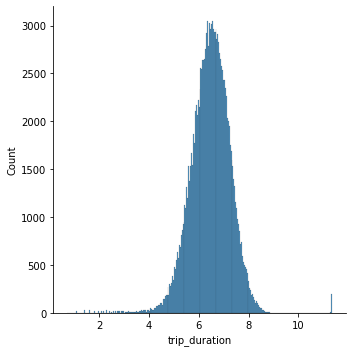

In [ ]:
## As in above case we cannot able to judge , 
##so we will apply log transformation and have a glance over it
sns.displot(np.log1p(data['trip_duration']).sample(frac = 0.1, random_state = 42))

In [ ]:
## looking at trip duration values
data['trip_duration'].value_counts()

368      1624
408      1584
348      1582
367      1581
358      1577
         ... 
85305       1
83256       1
83884       1
6419        1
8522        1
Name: trip_duration, Length: 7417, dtype: int64

In [ ]:
##already we saw there are no missing values in any of the features 
##however again having a sight over it
data['trip_duration'].isnull().sum()

0

In [ ]:
## out of curosity checking the unique values of trip duration feature
len(data['trip_duration'].unique())
# sns.countplot(x=data['trip_duration'])

7417

In [ ]:
## Converting duration units from seconds to hours  *feature extraction*
data['trip_duration_hour'] = data['trip_duration']/3600

In [ ]:
round(data['trip_duration_hour'].nlargest(10),2)

978383     979.52
924150     618.78
680594     569.33
355003     538.82
1234291     24.00
295382      24.00
73816       24.00
59891       24.00
1360439     24.00
753765      23.99
Name: trip_duration_hour, dtype: float64

In [ ]:
## as we saw earlier there are some values in trip duration showing 1 sec
## there is no possibliity of one second journey, Lets look how many records are there
len(data[data['trip_duration']==1])

33

In [ ]:
## trying too drop the records who's trip duration is 1 second
data = data[data['trip_duration'] != 1]

In [ ]:
## size of dataset after dropping some records
data.shape

(1458611, 12)

## Feature Extraction

### Here we tried to extract some usefull features  from already existing features

In [ ]:
## Converting below features data type into datatime as we observe them as strings
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [ ]:
## Extracting required values i.e day, month
data['pickup_day']=data['pickup_datetime'].dt.day_name()
data['dropoff_day']=data['dropoff_datetime'].dt.day_name()
data['pickup_month']=data['pickup_datetime'].dt.month
data['dropoff_month']=data['dropoff_datetime'].dt.month

In [ ]:
## Looking at rides in each month
data['pickup_month'].value_counts()

3    256184
4    251636
5    248485
2    238293
6    234314
1    229699
Name: pickup_month, dtype: int64

In [ ]:
## in above we can see that there no rides after the month 6 june
## lets look at dropoff in each month as well
data['dropoff_month'].value_counts()

## you can clear see difference in numbers this is because of some 
##rides duration are may be for mor than one day
## as from below we can say that 127  rides were started in june and ended in july

3    256130
4    251627
5    248553
2    238285
6    234241
1    229648
7       127
Name: dropoff_month, dtype: int64

### Generation of features like Distance,speed
#### as distance and speed are very much related with time (duration)

In [ ]:
# we have latitude and longitude details to find distance 
## so we will use havesine formula to extract distance between pickup and dropoff locations

from math import sqrt, cos, sin, asin, radians

In [ ]:
## we here develop a function to calculate distance between to poinst on earth

def haversine(data):
  ## assign latitude and longitude values to variables
  x1,y1 = data.pickup_latitude, data.pickup_longitude 
  x2,y2 = data.dropoff_latitude, data.dropoff_longitude
  
  ## raduis of the earth be 'r'
  r= 3956.5 
  # value is in miles (~6378 km)

  dx = radians(x2 - x1)
  dy = radians(y2 - y1)
  x1 = radians(x1)
  x2 = radians(x2)

  # lets here calculate a piece of formula and store in variables for smplification

  z = sin(dx/2)**2 + cos(x1)*cos(x2)*sin(dy/2)**2

  a = 2*asin(sqrt(z))

  ## this formula  from google search

  return int(r*a)
 ## the return value is distance between to given coordinates on earth

In [ ]:
## creation of new feature 
data['distance'] = data.apply( lambda x: haversine(x), axis =1)

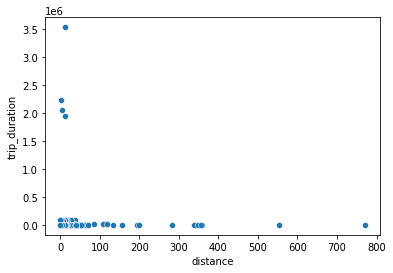

In [ ]:
## now we will see the relation or pattern by comparing Distance with trip duration

sns.scatterplot(x=data.distance, y=data.trip_duration)

In [ ]:
## checking wether distance zero have trip_duration zero or not
data.loc[data.distance == 0]['trip_duration']

0          455
3          429
4          435
5          443
6          341
          ... 
1458635    237
1458636    800
1458639    778
1458642    373
1458643    198
Name: trip_duration, Length: 542581, dtype: int64

In [ ]:
## so from about we have decided to replace all distance value with mean of that particular column
data['distance'].replace(0, data['distance'].mean())

0          1.627939
1          1.000000
2          3.000000
3          1.627939
4          1.627939
             ...   
1458639    1.627939
1458640    3.000000
1458641    4.000000
1458642    1.627939
1458643    1.627939
Name: distance, Length: 1458611, dtype: float64

In [ ]:
## feature speed extraction
data['speed'] = data['distance'] / data['trip_duration_hour']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


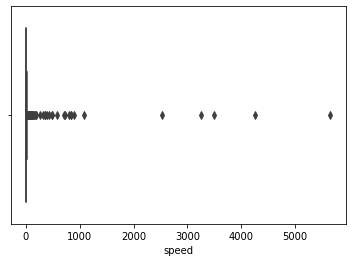

In [ ]:
## checking range of Speed feature
sns.boxplot(data.speed)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


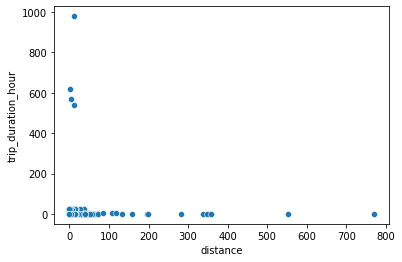

In [ ]:
sns.scatterplot(data.distance,data.trip_duration_hour)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


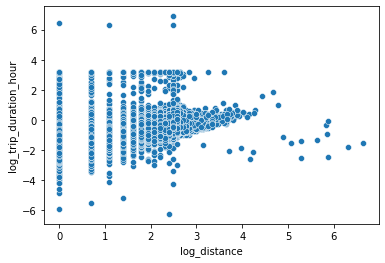

In [ ]:
## As we unable to judge from the above graph we will now apply log transfrom and 
## see how will be the trend
data['log_distance'] = np.log(data.distance)
data['log_trip_duration_hour'] = np.log(data.trip_duration_hour)

sns.scatterplot(data.log_distance, data.log_trip_duration_hour)

## We can clearly see that log of trip duration hour value above 2 is not 
## following any trend when compare to its value below 
## here we can drop those records

In [ ]:
## Dropping feature as discussed above

data = data[data['log_trip_duration_hour']<2]
data.shape

(1456567, 20)

In [ ]:
## we have extracted so many columns lets have a look at it

data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'trip_duration_hour', 'pickup_day', 'dropoff_day',
       'pickup_month', 'dropoff_month', 'distance', 'speed', 'log_distance',
       'log_trip_duration_hour'],
      dtype='object')

In [ ]:
## Here we have so many features, 
##in order to simplify our dataframe we will leaves some features
req_columns = ['passenger_count','store_and_fwd_flag','trip_duration', 'pickup_day', 'dropoff_day', 'pickup_month',
   'dropoff_month','distance']

data_new = data[req_columns]
data_new.head(5)

,passenger_count,store_and_fwd_flag,trip_duration,pickup_day,dropoff_day,pickup_month,dropoff_month,distance
0,1,N,455,Monday,Monday,3,3,0
1,1,N,663,Sunday,Sunday,6,6,1
2,1,N,2124,Tuesday,Tuesday,1,1,3
3,1,N,429,Wednesday,Wednesday,4,4,0
4,1,N,435,Saturday,Saturday,3,3,0


In [ ]:
## we will transform categorical data using one hot encoding

data_new1=pd.get_dummies(data_new,columns=['store_and_fwd_flag','pickup_day',
                                          'dropoff_day','pickup_month',
                                          'dropoff_month'])
data_new1

,passenger_count,trip_duration,distance,store_and_fwd_flag_N,store_and_fwd_flag_Y,pickup_day_Friday,pickup_day_Monday,pickup_day_Saturday,pickup_day_Sunday,pickup_day_Thursday,pickup_day_Tuesday,pickup_day_Wednesday,dropoff_day_Friday,dropoff_day_Monday,dropoff_day_Saturday,dropoff_day_Sunday,dropoff_day_Thursday,dropoff_day_Tuesday,dropoff_day_Wednesday,pickup_month_1,pickup_month_2,pickup_month_3,pickup_month_4,pickup_month_5,pickup_month_6,dropoff_month_1,dropoff_month_2,dropoff_month_3,dropoff_month_4,dropoff_month_5,dropoff_month_6,dropoff_month_7
0,1,455,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,1,663,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,2124,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,1,429,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
4,1,435,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458639,4,778,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1458640,1,655,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1458641,1,764,4,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
1458642,1,373,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
corr_matrix = data_new.corr()

corr_matrix['trip_duration'].sort_values(ascending=False)

trip_duration      1.000000
distance           0.695077
dropoff_month      0.058851
pickup_month       0.058687
passenger_count    0.014864
Name: trip_duration, dtype: float64

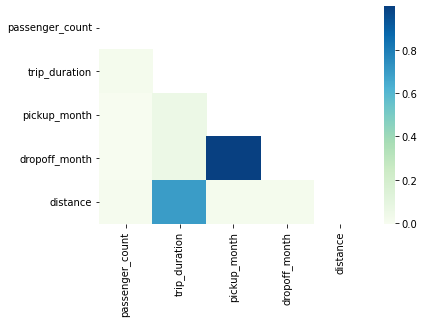

In [ ]:
mask = np.triu(np.ones_like(corr_matrix))

# f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr_matrix, mask = mask, cmap = "GnBu")

In [ ]:
## spliting responsive and predictive features

response = ['trip_duration']
predictors = list(data_new1.columns)
predictors.remove('trip_duration')

In [ ]:
data_predictors = data_new1[predictors]
data_response = data_new1[response]

In [ ]:
## here we will split the dataframe into train and test in ratio 85/15

from sklearn.model_selection import train_test_split

# X_train, X_test = train_test_split(data_new, test_size = 0.15, random_state = 0 )
X_train, X_test, y_train, y_test = train_test_split(data_predictors,data_response, test_size = 0.15, random_state = 0 )


In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
## Mean prediction

mean_pred = np.repeat(y_train.mean(), len(y_test))

rmse = sqrt(mean_squared_error(y_test, mean_pred))
rmse

667.8763343973836

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train,y_pred)
lin_rmse = sqrt(lin_mse)
lin_rmse

477.6112660681607

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

y_pred = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, y_pred)
tree_rmse = sqrt(tree_mse)
tree_rmse

407.8938462410207

## Trying to get better evaluation using cross validation

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, X_train, y_train, scoring = "neg_mean_squared_error",cv=10)

rmse_score = np.sqrt(np.abs(scores))

In [ ]:
def display_score(score):
  print('Scores :', score)
  print('Mean :', score.mean())
  print('Standard deviation : ', score.std())

In [ ]:
display_score(rmse_score)

Scores : [425.42480849 413.32473942 415.57533745 433.45026255 440.38319559
 423.62448573 425.46427203 424.549099   407.79381754 423.24207319]
Mean : 423.28320909814875
Standard deviation :  8.974108818754647


In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_pred)
forest_rmse = sqrt(forest_mse)
forest_rmse

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


KeyboardInterrupt: ignored